Team: Benny Ang, Rohen S/O Veera Kumaran, Raymon Goh, Frederik Woite

## Original assignment

### Generate synthetic data for linear regression

Create a function that generates a synthetic dataset for linear regression. The function should take the number of samples, the slope, the intercept, and noise as arguments, and return a NumPy array of input values (X) and corresponding output values (Y).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def noise_generation(n_samples, noise_std_dev):
    noise = np.random.randn(n_samples, 1) * noise_std_dev
    return noise

def generate_synthetic_data(n_samples, slope, intercept, noise):
    if len(noise) != n_samples: 
        print("Please double-check that number of noise observations is equal to n_samples. Returning NA vals")
        return None, None
        
    X = np.random.rand(n_samples, 1) * 10 # Generate random X values between 0 and 10
    Y = slope * X + intercept + noise
    return X, Y
    
noise = noise_generation(100, 1)
X, Y = generate_synthetic_data(100, 2, 5, noise)

### Implement simple linear regression using the normal equation

Implement simple linear regression using the normal equation, and fit a model to the synthetic data generated in Exercise 1.

In [6]:
def normal_equation(X, Y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # Add bias term
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    intercept_estimate = theta[0][0]
    slope_estimate = theta[1][0]
    return slope_estimate, intercept_estimate

slope_estimate_normal, intercept_estimate_normal = normal_equation(X, Y)
print(f"Normal Equation Estimates: Slope = {slope_estimate_normal:.4f}, Intercept = {intercept_estimate_normal:.4f}")

Normal Equation Estimates: Slope = 2.0439, Intercept = 4.8954


### Visualize the data and the fitted model

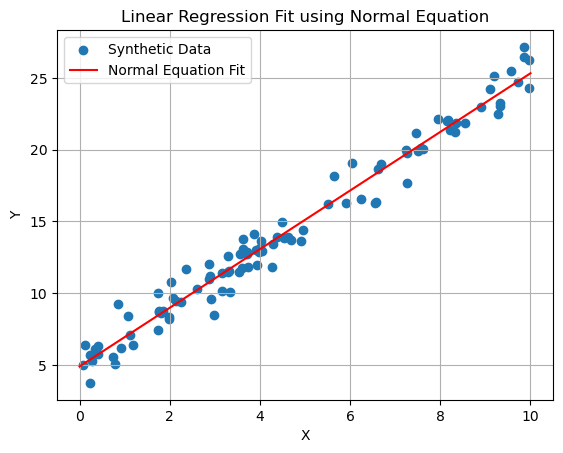

In [8]:
# Plot the synthetic data
plt.scatter(X, Y, label='Synthetic Data')

# Plot the regression line from the normal equation
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
Y_plot_normal = slope_estimate_normal * X_plot + intercept_estimate_normal
plt.plot(X_plot, Y_plot_normal, color='red', label='Normal Equation Fit')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit using Normal Equation')
plt.legend()
plt.grid(True)
plt.show()

### Evaluate model performance

Create a function that calculates the Mean Squared Error (MSE) and R-squared score for a given set of true output values (Y) and predicted output values (Y_pred).

In [10]:
def evaluate_model(Y, Y_pred):
    # Calculate Mean Squared Error (MSE)
    mse = np.mean((Y - Y_pred)**2)
    
    # Calculate R-squared score
    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    return mse, r2

# Evaluate Normal Equation model
X_b = np.c_[np.ones((X.shape[0], 1)), X]
Y_pred_normal = X_b.dot(np.array([[intercept_estimate_normal], [slope_estimate_normal]]))
mse_normal, r2_normal = evaluate_model(Y, Y_pred_normal)
print(f"Normal Equation Model Performance: MSE = {mse_normal:.4f}, R-squared = {r2_normal:.4f}")

Normal Equation Model Performance: MSE = 0.9752, R-squared = 0.9734


The R-squared value is high, indicating that the model fits the simulated data very well. The value of 0.9698 means that the independent variable x is able to explain 97.0% of the variation of the y-value. Intuitively, this result is expected as the y-value is calculated almost directly from the x-values (with the noise causing the 3% discrepancy).

### Testing performance of the originally fit model against new test data

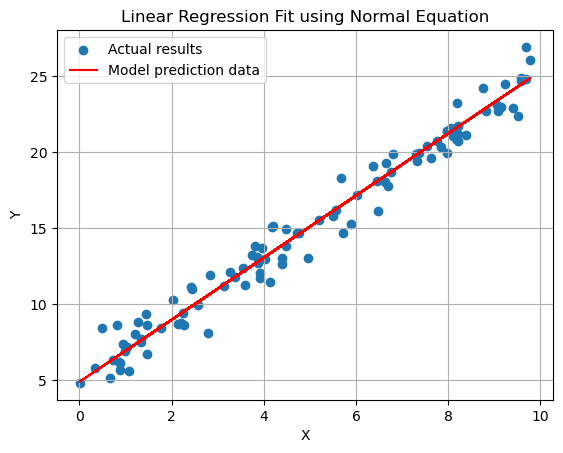

In [13]:
X_test, Y_test_actual = generate_synthetic_data(100, 2, 5, noise)

plt.scatter(X_test, Y_test_actual, label='Actual results')

Y_test_model = slope_estimate_normal * X_test + intercept_estimate_normal
plt.plot(X_test, Y_test_model, color='red', label='Model prediction data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit using Normal Equation')
plt.legend()
plt.grid(True)
plt.show()

As seen from the above graph, upon testing the model on new test data, due to the simplicity of the data, the trained linear regression model fits the data well.

## Linear Regression model extension studies

### Regularisation using Ridge regularisation

Regularisation is a method used to prevent the model from being overfitted to the data. We have considered 2 main types of regularisation:

1) L1 Regularisation - Lasso: Adds absolute value of the sum of the coefficients as a penalty to the loss function
2) L2 Regularisation - Ridge: Adds the squared sum of coefficients as the penalty to the loss function

L1 Regularisation can reduce coefficient values to zero, while L2 can only reduce coefficient values close to zero. This means that Lasso regularisation has the added benefit of assisting to achieve feature selection by penalizing the weights to approximately equal to zero if that feature does not serve any purpose in the model.

However, there is nuance to the usage of L1 and L2 Regularisation. The L1 penalty in Lasso makes the cost function non-differentiable at 0 and unsolvable in the closed-form using matrix algebra. Hence, Lasso cannot be used with the normal equation. Thus, in this section we explore the effects of the use of Ridge regularisation with the normal equation.

In [18]:
# Use make_pipeline so we don't have to choose lambda value
# Includes scaling
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Try these lambda values (alphas)
alphas = [0.01, 0.1, 1, 10, 100]

model = make_pipeline(
    StandardScaler(),   # Important for Ridge
    RidgeCV(alphas=alphas, store_cv_values=True)
)

model.fit(X, Y)

# Get the best lambda (alpha)
ridge = model.named_steps['ridgecv']
ridge_coef_scaled = ridge.coef_[0][0]
ridge_intercept_scaled = ridge.intercept_[0]
print("Best lambda (alpha):", ridge.alpha_)
print("Coefficient is:", ridge_coef_scaled)
print("Intercept is:", ridge_intercept_scaled)

Best lambda (alpha): 0.01
Coefficient is: 5.978049973501356
Intercept is: 14.066481214077475


In [19]:
# Use make_pipeline so we don't have to choose lambda value (the strength of regularisation)
# Does not include scaling
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Try these lambda values (alphas)
alphas = [0.01, 0.1, 1, 10, 100]

model = make_pipeline(
    RidgeCV(alphas=alphas, store_cv_values=True)
)

model.fit(X, Y)

# Get the best lambda (alpha)
ridge = model.named_steps['ridgecv']
ridge_coef_unscaled = ridge.coef_[0][0]
ridge_intercept_unscaled = ridge.intercept_[0]
print("Best lambda (alpha):", ridge.alpha_)
print("Coefficient is:", ridge_coef_unscaled)
print("Intercept is:", ridge_intercept_unscaled)

Best lambda (alpha): 0.01
Coefficient is: 2.0438916510024683
Intercept is: 4.895544914207347


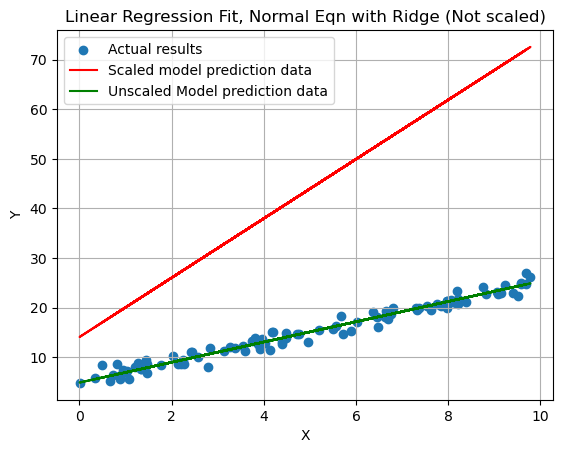

In [20]:
plt.scatter(X_test, Y_test_actual, label='Actual results')

Y_test_ridge_model_scaled = ridge_coef_scaled * X_test + ridge_intercept_scaled
Y_test_ridge_model_unscaled = ridge_coef_unscaled * X_test + ridge_intercept_unscaled
plt.plot(X_test, Y_test_ridge_model_scaled, color='red', label='Scaled model prediction data')
plt.plot(X_test, Y_test_ridge_model_unscaled, color='green', label='Unscaled Model prediction data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit, Normal Eqn with Ridge (Not scaled)')
plt.legend()
plt.grid(True)
plt.show()

The above graph shows the 
The above graph shows the impact of scaling the data before running the model. Including the line standard scaler transforms the data before the model is trained on it. Each feature fed into the model, after transforming, will have a mean of 0 and a standard deviation of 1. Thus, the coefficients learned apply to the standardized inputs, not the original values. The intercepts also shift to accommodate the centered data. As a result the coefficients and intercept look numerically different. In comparison, the unscaled version is trained on the raw data. 

Scaling should not be used if all the features are on the same scale, as with the x values in this assignment.

In [22]:
data = {
    "Normal Equation": {
        "Coefficient": slope_estimate_normal,
        "Intercept": intercept_estimate_normal
    },

    "Normal Equation Ridge Unscaled": {
        "Coefficient": ridge_coef_unscaled,
        "Intercept": ridge_intercept_unscaled
    },
        "Normal Equation Ridge Scaled": {
        "Coefficient": ridge_coef_scaled,
        "Intercept": ridge_intercept_scaled
    }
}

comparison_table = pd.DataFrame(data)
display(comparison_table)

,Normal Equation,Normal Equation Ridge Unscaled,Normal Equation Ridge Scaled
Coefficient,2.043916,2.043892,5.978050
Intercept,4.895438,4.895545,14.066481


From the table above, we see that there is not much difference between the unregularised normal equation and the normal equation with ridge regularisation applied. This is due to the fact that the data is close to linear, making the linear regression model fit the data well but at the same time without being overfitted.

### Alternative to Normal Equation - The Gradient Descent method

While the normal equation is an analytical solution to minimise the loss function, gradient descent takes a different approach. It is an iterative algorithm that converges to the minimum value of the cost loss function by updating model parameters in the opposite direction of the gradient (via partial derivatives) of the loss function with respect to those parameters. 

The gradient descent also makes use of a learning rate which controls the speed of convergence. However, care must be taken when defining a learning rate, as too high a learning rate would jump over the minimum i.e. will not converge, while too low a learning rate will increase the time it takes to converge and hence increase the model training time.

The steps are as follows:

1) Initialise the parameters w and b to zero
2) Iteratively perform the following sub steps until convergence:
   - Compute the gradient of the cost function (via the following partial derivatives)
     
     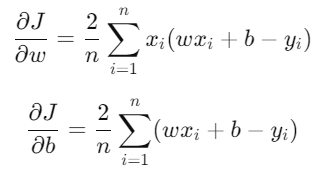
   - Update the parameters using the learning rate α
     
     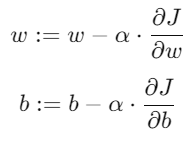

   (where J is the loss function)

The outputs of the gradient_descent model would be the weights and the intercept, which are the slope and intercept respectively.

In [26]:
def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    
    n = len(x)
    w = 0.0
    b = 0.0

    for _ in range(epochs):
        y_pred = w * x + b
        error = y_pred - y

        # Compute gradients
        dw = (2/n) * np.dot(x.T, error)
        db = (2/n) * np.sum(error)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

    return w[0][0], b

In [27]:
GD_slope_normal, GD_intercept_normal = gradient_descent(X, Y)
print(f"Normal Equation Estimates: Slope = {GD_slope_normal:.4f}, Intercept = {GD_intercept_normal:.4f}")

Normal Equation Estimates: Slope = 2.0460, Intercept = 4.8824


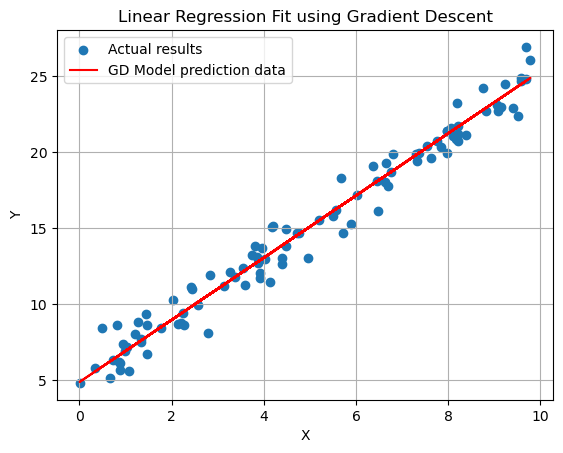

In [28]:
plt.scatter(X_test, Y_test_actual, label='Actual results')

Y_test_model_GD = GD_slope_normal * X_test + GD_intercept_normal
plt.plot(X_test, Y_test_model_GD, color='red', label='GD Model prediction data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit using Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

- As expected, the gradient descent model is able to fit the test data as well as the normal equation. This is due to the simplicity of the data, having only one feature. When the number of features increases (beyond 10,000), the normal equation becomes computationally challenging (the equation has a time complexity of O(n^3), which makes it run slowly when the number of features increase. Hence, for datasets (e.g. datasets collected by banks) with many dimensions and features, it may be better to use the gradient descent model.

- However, for data that has a relatively lower number of features (below 10,000), it may be better to stick with the normal equation, as in that case you would have one less hyper parameter to choose (you would not have to select a learning rate).

### Application of Linear Regression to non-linear data

The original data followed a simple Y = mX + noise relation, hence intuitively, the linear regression models, both via normal equation and gradient descent, were able to fit the data and fit new train data well.

In this segment, we look into how well the linear regression model performs against non-linear data.

In [32]:
## Different types of functions
# Quadratic, sinusoidal, piecewise linear
def univariate_model(model_type, n_samples, noise):

    if len(noise) != n_samples: 
        print("Please double-check that number of noise observations is equal to n_samples. Returning NA vals")
        return None, None
    
    X = np.random.rand(n_samples, 1) * 10
    
    if model_type == "piecewise linear":
        Y = np.where(X < 5, 2 * X + 1, -3 * X + 30) + noise
    elif model_type == "quadratic":
        Y = 0.5 * X**2 + 3 * X + 5 + noise
    elif model_type == "sinusoidal":
        Y = 10 * np.sin(X) + noise

    return X, Y

In [33]:
def fit_models(model_types, noise, LR_type):

    model_data = {}
    LR_outputs = {}
    evaluation_metrics = {}
    
    for model in model_types:
        X, Y = univariate_model(model, 100, noise)
        model_data[model] = {'X': X, 'Y': Y}

    for model, data in model_data.items():
        X, Y = data['X'], data['Y']
        
        if LR_type == "normal equation":
            slope, intercept = normal_equation(X, Y)
        elif LR_type == "gradient descent":
            slope, intercept = gradient_descent(X, Y)
        else:
            raise ValueError("Invalid LR_type. Use 'normal equation' or 'gradient descent'.")

        LR_outputs[model] = {'Slope': slope, 'Intercept': intercept}
        Y_pred = intercept + slope * X
        mse, r2 = evaluate_model(Y, Y_pred)
        evaluation_metrics[model] = {'MSE': mse, 'R²': r2}

    evaluation_table = pd.DataFrame(evaluation_metrics).T
    print("Model Evaluation Summary:")
    display(evaluation_table)
    
    n_models = len(model_data)
    n_cols = 2
    n_rows = (n_models + 1) // n_cols

    plt.figure(figsize=(12, 4 * n_rows))
    
    for i, (name, data) in enumerate(model_data.items()):
        X = data['X']
        Y = data['Y']
    
        slope = LR_outputs[name]['Slope']
        intercept = LR_outputs[name]['Intercept']
    
    
        X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        Y_pred = slope * X_plot + intercept
    
        # Plotting
        plt.subplot(n_rows, n_cols, i + 1)
        plt.scatter(X, Y, color='blue', label='Data')
        plt.plot(X_plot, Y_pred, color='red', label='Linear Fit')
        plt.title(f"{name.title()} Model")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()


    return LR_outputs

#### Non-linear data - Normal equation method

Model Evaluation Summary:


,MSE,R²
piecewise linear,12.456384,0.003497
quadratic,14.264470,0.978158
sinusoidal,52.311408,0.001740


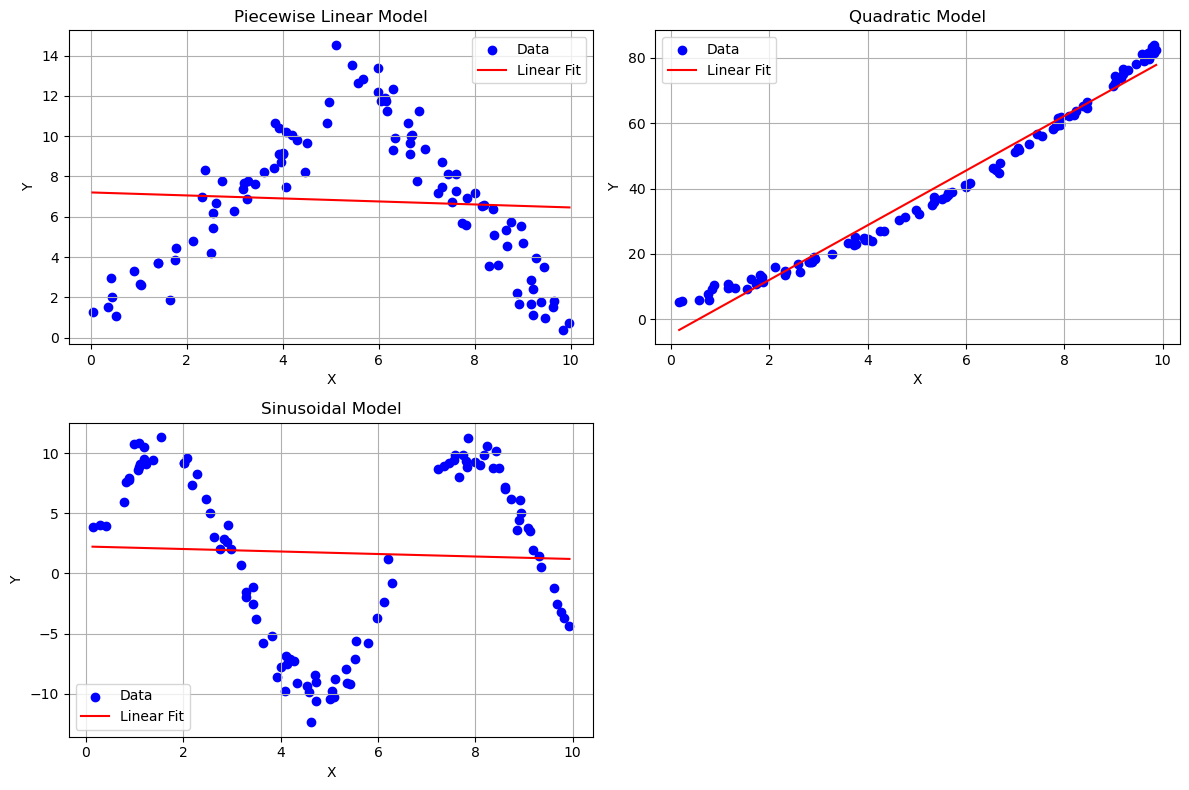

,piecewise linear,quadratic,sinusoidal
Slope,-0.074626,8.344781,-0.103987
Intercept,7.208898,-4.595777,2.234822


In [35]:
model_types = ["piecewise linear", "quadratic", "sinusoidal"]
LR_parameters_normal = fit_models(model_types, noise, "normal equation")
display(pd.DataFrame(LR_parameters_normal))

- From the charts, we can see that the model (calculated according to the normal equation) does not fit the data well for the Piecewise linear data and the sinusoidal model well at all. The R-square values are low (9.2% and 0.9% respectively), indicating that the independent values in the model (x values) do not account for vast majority of the variation in the dependent variable (y values), and hence that the model will not be useful in predicting y values for such non-linear data.

- For the quadratic data, the fit seems good at first glance, with R-squared value of 97.2%. This could be seen as implying that the Linear Regression model fits quadratic data well and can be used for predictions of the dependent variable. However, with our knowledge of the quadratic data, we can form the hypothesis that the model only fits the quadratic data well for the sample of x-values that we observed (within range from 0 - 10), but will not fit well for out-of-sample data where the range of the x-values are not constrained to be below 10.

#### Non-linear data - Gradient Descent method

Model Evaluation Summary:


,MSE,R²
piecewise linear,17.502150,0.007570
quadratic,16.242532,0.971618
sinusoidal,54.552885,0.000620


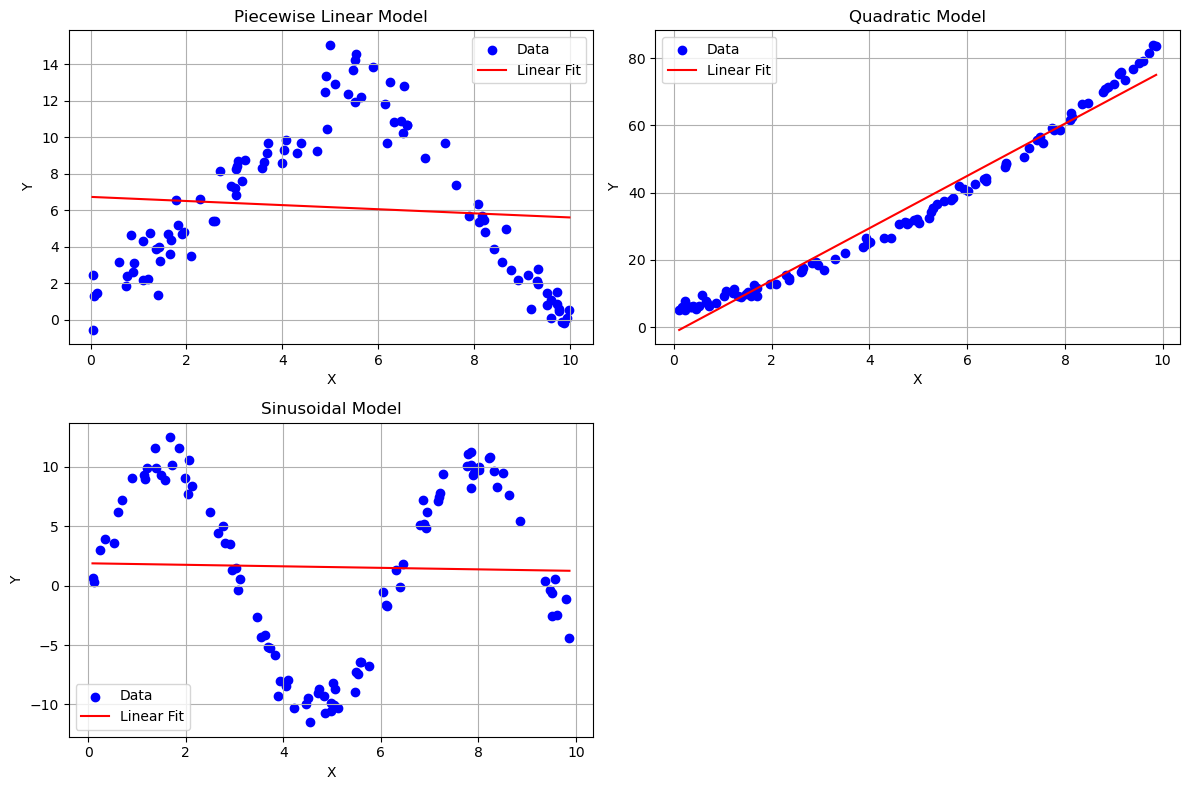

,piecewise linear,quadratic,sinusoidal
Slope,-0.112697,7.776582,-0.063874
Intercept,6.735155,-1.682916,1.876986


In [38]:
model_types = ["piecewise linear", "quadratic", "sinusoidal"]
LR_parameters_GD = fit_models(model_types, noise, "gradient descent")
display(pd.DataFrame(LR_parameters_GD))

The gradient descent method yields similar results.

#### Out-of-sample testing for the Quadratic data

In this section we test our hypothesis that the model trained on the quadratic data is only a good fit for the observed sample, but will not be a good fit for out of sample data. 

In [42]:
test_x_vals_quad = np.random.rand(100, 1) * 20
actual_y_vals_quad = 0.5 * test_x_vals_quad ** 2 + 3 * test_x_vals_quad + 5 + noise

quad_pred = LR_parameters_normal['quadratic']['Slope'] * test_x_vals_quad + LR_parameters_normal['quadratic']['Intercept']

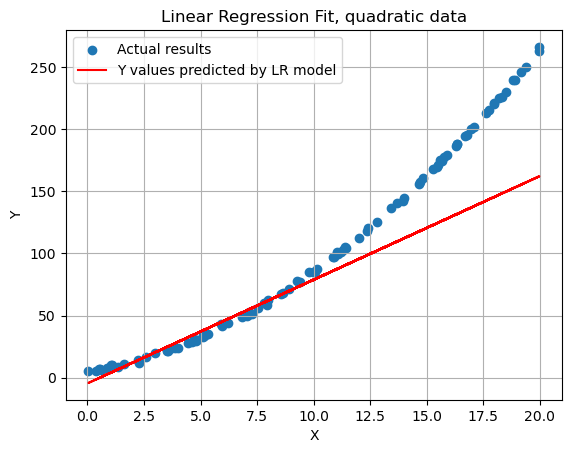

In [43]:
plt.scatter(test_x_vals_quad, actual_y_vals_quad, label='Actual results')

plt.plot(test_x_vals_quad, quad_pred, color='red', label='Y values predicted by LR model')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit, quadratic data')
plt.legend()
plt.grid(True)
plt.show()

As expected, the y values predicted by the linear regression model perform much worse out of sample, and the performance will decrease even further as the range of x values increases. This demonstrates the need to understand the nature behind the x and y value pairs, rather than just relying on model output. A trading model could fit in-sample stock data well with high Sharpe Ratio and returns, but may flop upon live-testing. 

Thus, financial intuition is important when deploying machine learning methods on financial data.

### Non-normal noise

Another extension is generating different types of noise for the data. In the original question, the noise follows a standard Gaussian distribution with mean of 0 and a standard deviation of 1. This implies that outliers are few and majority of the noise figures will be scattered around the mean of zero. This is much unlike the behaviour of stock data, where there are often large outliers (e.g. involuntary crashes like the GFC / voluntary crashes like the US Liberation day / huge rallies like the retraction of US Liberation day). This section thus seeks to determine the performance of the linear regression model in fitting non-normal noise distributions. 

- Laplace noise. The laplace distribution is similar in shape to the gaussian distribution. However, it is characterised by a higher kurtosis than the gaussian distribution. This means that the tails are fatter, leading to larger numbers of outliers. It has 2 choice parameters: mean and decay. The existence of fatter tails make this a better noise approximation than Gaussian noise for stock data simulations.
- Uniform noise. The uniform distribution is characterised by a flat pdf and constant gradient in the cdf. Thus, the noise generated has an equal probability of falling anywhere along the range. A difference is that theoretically, the Gaussian distribution spans the entire number line and can generate noise extremely far from the mean (albeit at a very very low probability), while uniform noise will only fall (uniformly) between the range listed.
- Poisson noise. Also known as shot noise, Poisson noise is characterised in situations where the data represents counts of discrete events. Unlike the Gaussian distribution, Poisson noise models generate discrete, positive-only, and integer valued noise. Because of the discrepancy between the nature of the data expected by linear regression being continuous, normally distributed values, and the discrete, skewed nature of Poisson noise, it would be good to investigate how well linear regression performs with this kind of data.

In [47]:
## Different types of noise
# Uniform noise, Laplace noise, Poisson noise

def noise_generator(noise_type, n_samples, uniform_range=2, laplace_mean =0, laplace_decay = 1, poisson_lam = 1):

    if noise_type == "uniform":
        noise = np.random.uniform(-uniform_range, uniform_range, size=(n_samples, 1))
    elif noise_type == "laplace":
        noise = np.random.laplace(laplace_mean, laplace_decay, size=(n_samples, 1))
    elif noise_type == "Poisson": 
        noise = np.random.poisson(poisson_lam, size=(n_samples, 1))

    return noise

Model Evaluation Summary:


,MSE,R²
uniform,1.677840,0.954723
laplace,1.468991,0.955775
Poisson,0.917712,0.974479


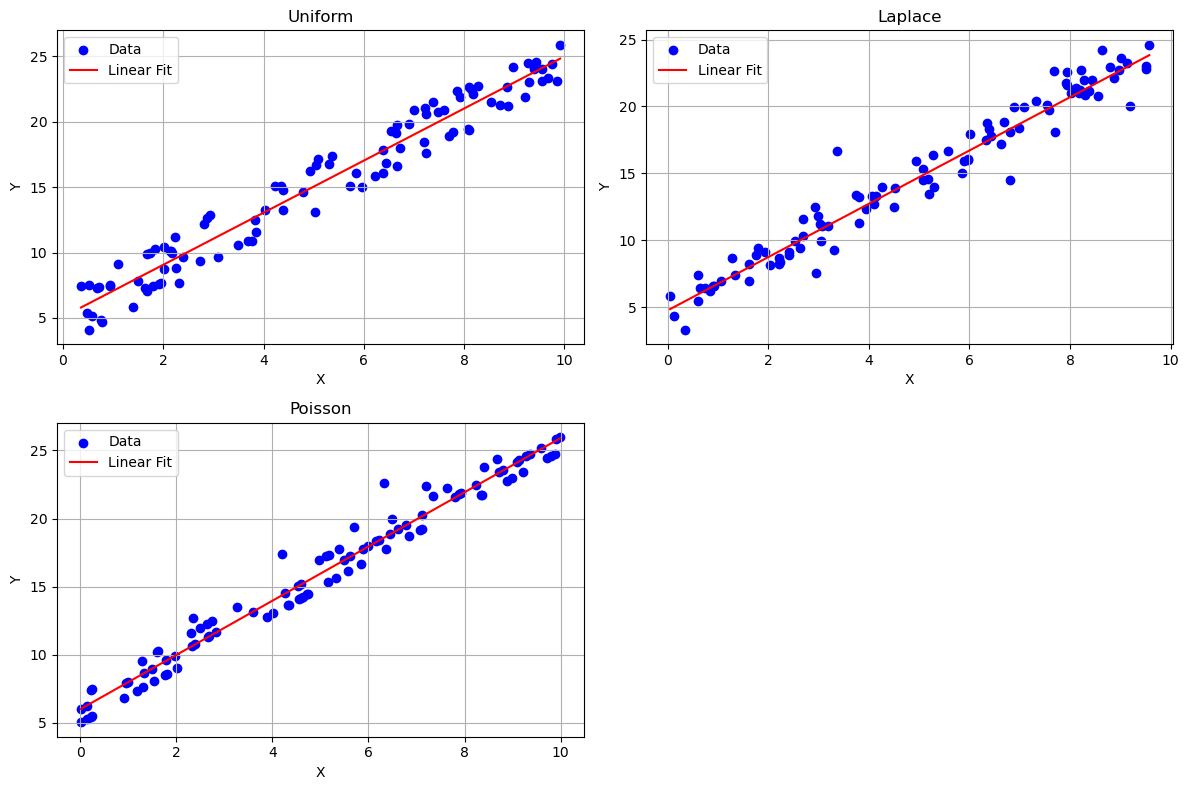

,uniform,laplace,Poisson
Slope,1.988341,2.011784,1.991179
Intercept,5.079877,4.766134,6.003522


In [48]:
noise_types = ["uniform", "laplace", "Poisson"]
X_Y_data_noise_test = {}
noise_test_outputs = {}
noise_test_eval_metrics = {}

for noise_type in noise_types:
    
    noise = noise_generator(noise_type, 100)
    X, Y = generate_synthetic_data(100, 2, 5, noise)

    X_Y_data_noise_test[noise_type] = {'X':X, 'Y':Y}

for noise_type, data in X_Y_data_noise_test.items():
    X, Y = data['X'], data['Y']
    slope, intercept = normal_equation(X,Y)
    noise_test_outputs[noise_type] = {'Slope':slope, 'Intercept': intercept}

    Y_pred = intercept + slope * X
    mse, r2 = evaluate_model(Y, Y_pred)
    noise_test_eval_metrics[noise_type] = {'MSE': mse, 'R²': r2}

noise_test_eval_table = pd.DataFrame(noise_test_eval_metrics).T
print("Model Evaluation Summary:")
display(noise_test_eval_table)

n_models = len(X_Y_data_noise_test)
n_cols = 2
n_rows = (n_models + 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))
    
for i, (name, data) in enumerate(X_Y_data_noise_test.items()):
    X = data['X']
    Y = data['Y']
    
    slope_noise_test = noise_test_outputs[name]['Slope']
    intercept_noise_test = noise_test_outputs[name]['Intercept']
    
    X_plot_noise_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    Y_pred_noise_test = slope * X_plot_noise_test + intercept_noise_test
    
# Plotting
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X.ravel(), Y.ravel(), color='blue', label='Data')
    plt.plot(X_plot_noise_test, Y_pred_noise_test, color='red', label='Linear Fit')
    plt.title(f"{name.title()}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    
plt.tight_layout()
plt.show()

display(pd.DataFrame(noise_test_outputs))

The scatterplots in the graphs above demonstrate the nature of the different types of noise. We can clearly observe the relatively more evenly spaced uniform noise, the increased number of outliers in the Laplace noise, and the clustering around the mean of the Poisson noise.

Upon reading the results, we see that on base noise parameterisation, linear regression is still able to model the data well with low min MSE and high R-squared values. It should be noted, however, that this depends on the hyperparameters of the noise. For example, the model with Laplace noise is extremely sensitive to Laplace decay, and the MSE rapidly rises and R-squared decreases sharply as the Laplace decay increases. As the parameters of each noise takes increasingly extreme values, the Linear Regression model increasingly fails to fit the simulated data.

#### GARCH noise

In real financial markets, volatility is characterised by volatility clustering and time-varying volatility (heteroskedastic), as opposed to the homoskedastic nature of Gaussian noise. Thus, in order to test the potential for Linear Regression to handle real market volatility, in this section we will use the GARCH model to generate noise which will exhibit characteristics of volatility observed in actual financial markets.

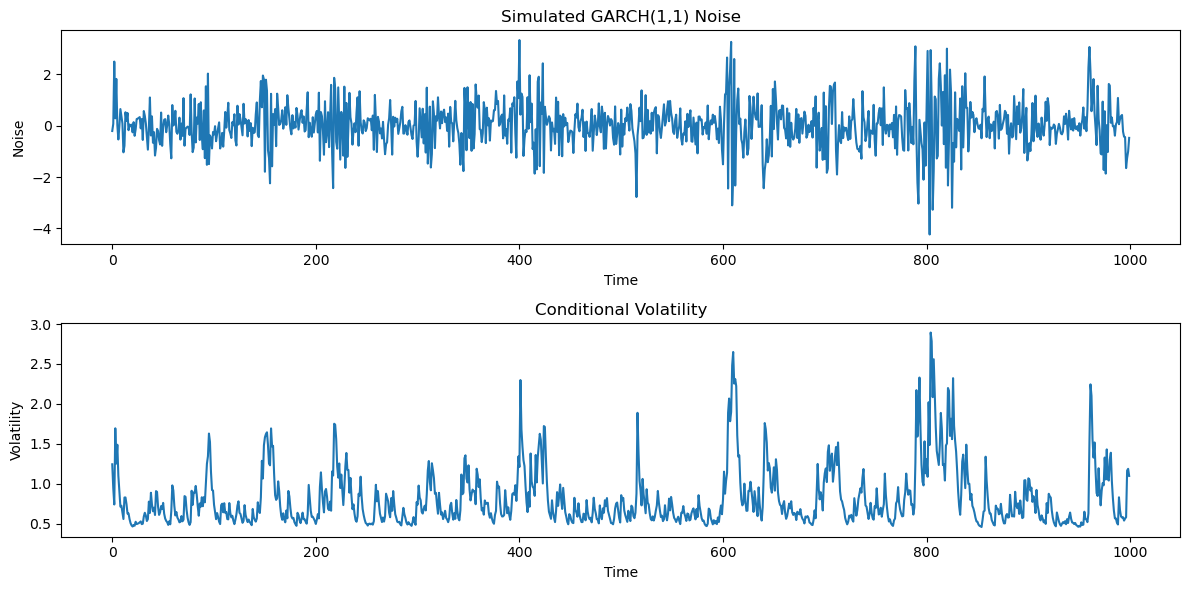

In [51]:
from arch import arch_model

# Length of simulation
datapoints = 1000

# GARCH(1,1) model parameters
omega = 0.1
alpha = 0.4
beta = 0.5

am = arch_model(None, mean='Zero', vol='GARCH', p=1, q=1)
simulated_data = am.simulate([omega, alpha, beta], datapoints)

noise_GARCH = np.array(simulated_data['data']).reshape(-1,1)
volatility = np.array(simulated_data['volatility'])

# Visualising the GARCH noise
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(noise_GARCH)
plt.title("Simulated GARCH(1,1) Noise")
plt.xlabel("Time")
plt.ylabel("Noise")

plt.subplot(2, 1, 2)
plt.plot(volatility)
plt.title("Conditional Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.tight_layout()
plt.show()

From the above plot, we see the nature of the GARCH volatility occurring in bursts of high volatility following periods of low volatility. This demonstrates the propensity for volatility in financial markets to occur in clusters (e.g. during crashes such as the COVID-19 crash).

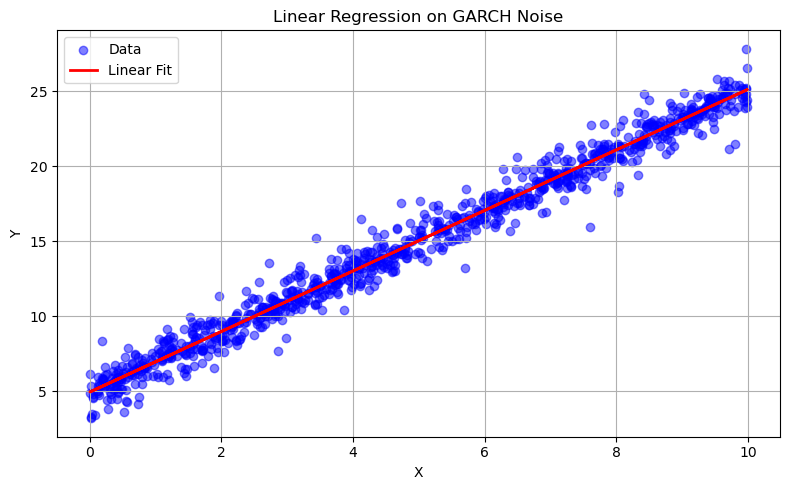

Normal Equation Model on GARCH noise performance: MSE = 0.7410, R-squared = 0.9795


In [53]:
GARCH_X, GARCH_Y = generate_synthetic_data(1000, 2, 5, noise_GARCH)
GARCH_slope, GARCH_intercept = normal_equation(GARCH_X, GARCH_Y)

Y_pred_GARCH = GARCH_intercept + GARCH_slope * GARCH_X

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(GARCH_X, GARCH_Y, color='blue', alpha=0.5, label='Data')
plt.plot(GARCH_X, Y_pred_GARCH, color='red', label='Linear Fit', linewidth=2)
plt.title("Linear Regression on GARCH Noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mse_GARCH, r2_GARCH = evaluate_model(GARCH_Y, Y_pred_GARCH)
print(f"Normal Equation Model on GARCH noise performance: MSE = {mse_GARCH:.4f}, R-squared = {r2_GARCH:.4f}")

The Linear Regression model is still accurate, yielding high performance metrics. As usual, the performance of the model depends on the parameters of the noise. We now try the model again with a higher level of ambient volatility.

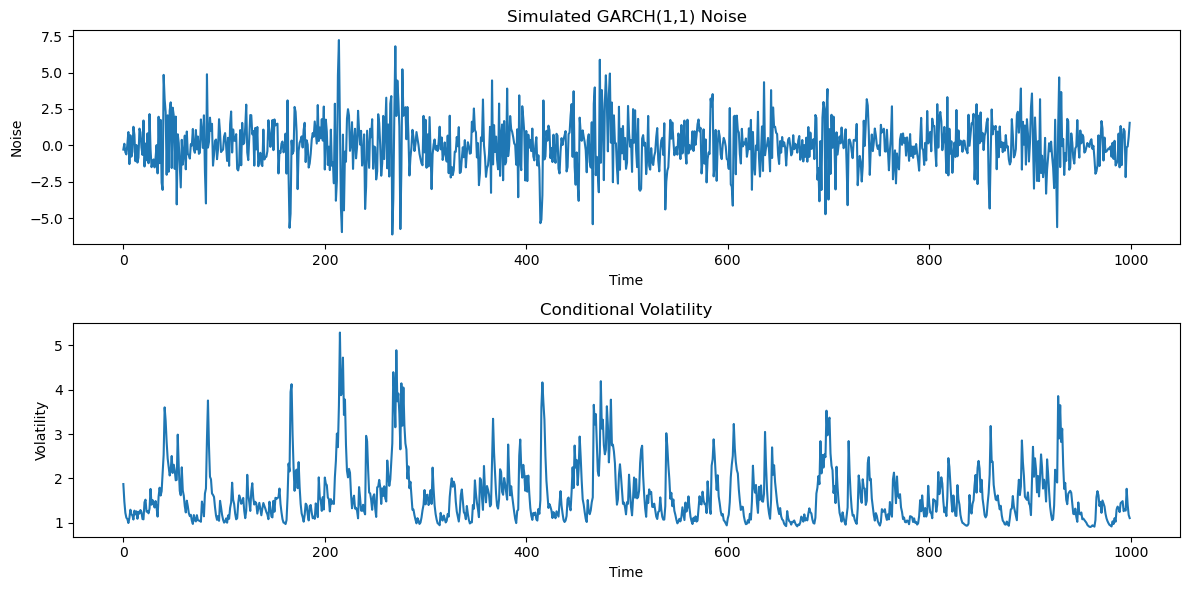

In [55]:
from arch import arch_model

# Length of simulation
datapoints = 1000

# GARCH(1,1) model parameters
omega = 0.4
alpha = 0.4
beta = 0.5

am = arch_model(None, mean='Zero', vol='GARCH', p=1, q=1)
simulated_data = am.simulate([omega, alpha, beta], datapoints)

noise_GARCH = np.array(simulated_data['data']).reshape(-1,1)
volatility = np.array(simulated_data['volatility'])

# Visualising the GARCH noise
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(noise_GARCH)
plt.title("Simulated GARCH(1,1) Noise")
plt.xlabel("Time")
plt.ylabel("Noise")

plt.subplot(2, 1, 2)
plt.plot(volatility)
plt.title("Conditional Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.tight_layout()
plt.show()

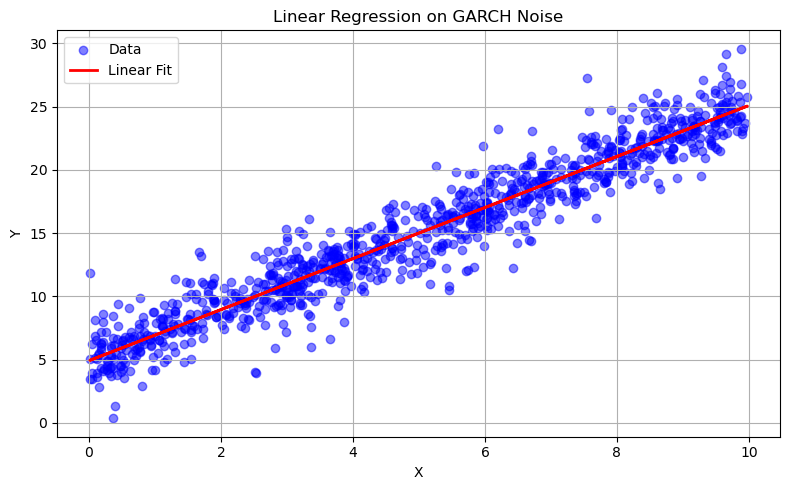

Normal Equation Model on GARCH noise performance: MSE = 2.8414, R-squared = 0.9219


In [56]:
GARCH_X, GARCH_Y = generate_synthetic_data(1000, 2, 5, noise_GARCH)
GARCH_slope, GARCH_intercept = normal_equation(GARCH_X, GARCH_Y)

Y_pred_GARCH = GARCH_intercept + GARCH_slope * GARCH_X

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(GARCH_X, GARCH_Y, color='blue', alpha=0.5, label='Data')
plt.plot(GARCH_X, Y_pred_GARCH, color='red', label='Linear Fit', linewidth=2)
plt.title("Linear Regression on GARCH Noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mse_GARCH, r2_GARCH = evaluate_model(GARCH_Y, Y_pred_GARCH)
print(f"Normal Equation Model on GARCH noise performance: MSE = {mse_GARCH:.4f}, R-squared = {r2_GARCH:.4f}")

The model performance has fallen, with MSE increasing greatly due to the large numbers of outliers. However, the general shape of the data is basically still linear due to how the x values were used to generate the y values. As a result, the R-squared value is still reasonably high.

### Conclusions on non-linearity of data and noise
In conclusion, the model used to generate the y values from the x values makes the most difference in the performance of the linear regression model. With reasonable parameterisation, the noise does not affect the performance of the model as much as the underlying relationship between the x and the y variables.